# Convolutional Neural Network To Classify Images Of Cats And Dogs

In [1]:
import tensorflow as tf
import numpy as np
import tempfile
import zipfile

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
temp_dir = tempfile.TemporaryDirectory()

with zipfile.ZipFile('dataset.zip', 'r') as zip:
    zip.extractall(temp_dir.name)

In [9]:
model = Sequential()
model.add(InputLayer(shape= (64, 64, 3)))

model.add(Conv2D(filters= 32, kernel_size= (3, 3), activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2, 2)))

model.add(Conv2D(filters= 32, kernel_size= (3, 3), activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2, 2)))

model.add(Flatten())

model.add(Dense(units= 128, activation= 'relu'))
model.add(Dropout(rate= 0.2))
model.add(Dense(units= 128, activation= 'relu'))
model.add(Dropout(rate= 0.2))

model.add(Dense(units= 1, activation= 'sigmoid'))

In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(), loss= 'binary_crossentropy', metrics= ['accuracy', ])

In [12]:
generator_train = ImageDataGenerator(rescale= 1./255, rotation_range= 7, horizontal_flip= True, shear_range= 0.2, height_shift_range= 0.07, zoom_range= 0.2)
generator_test = ImageDataGenerator(rescale= 1./255)

In [13]:
dataset_train = generator_train.flow_from_directory(f'{temp_dir.name}/dataset/training_set', target_size= (64, 64), batch_size= 32, class_mode= 'binary')
dataset_test = generator_test.flow_from_directory(f'{temp_dir.name}/dataset/test_set', target_size= (64, 64), batch_size= 32, class_mode= 'binary')

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
model.fit(
    dataset_train,
    epochs= 10,
    validation_data= dataset_test
)

c:\Users\Pedro\Documents\codigos\Deep-Learning\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.5556 - loss: 0.9221

c:\Users\Pedro\Documents\codigos\Deep-Learning\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 279ms/step - accuracy: 0.5557 - loss: 0.9213 - val_accuracy: 0.5000 - val_loss: 1.5042
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.6144 - loss: 0.7019 - val_accuracy: 0.5100 - val_loss: 0.8416
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.6560 - loss: 0.6307 - val_accuracy: 0.5750 - val_loss: 0.7589
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - accuracy: 0.6635 - loss: 0.6094 - val_accuracy: 0.6480 - val_loss: 0.6249
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.6969 - loss: 0.5809 - val_accuracy: 0.6070 - val_loss: 0.7268
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.7103 - loss: 0.5639 - val_accuracy: 0.6610 - val_loss: 0.6407
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.7155 - loss: 0.5571 - val_accuracy: 0.6670 - val_loss: 0.5953
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.7303 - loss: 0.5361 - val_acc

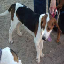

In [15]:
image_test = image.load_img(f'{temp_dir.name}/dataset/test_set/cachorro/dog.3500.jpg', target_size= (64, 64))
image_test

In [16]:
type(image_test)

PIL.Image.Image

In [18]:
image_test = image.img_to_array(image_test)
image_test /= 255
image_test

array([[[0.47058824, 0.49019608, 0.46666667],
        [0.41568628, 0.43529412, 0.4117647 ],
        [0.44705883, 0.46666667, 0.44313726],
        ...,
        [0.22745098, 0.16470589, 0.11372549],
        [0.25490198, 0.14901961, 0.11372549],
        [0.27450982, 0.13725491, 0.11372549]],

       [[0.4117647 , 0.43137255, 0.40784314],
        [0.5058824 , 0.5254902 , 0.5019608 ],
        [0.5254902 , 0.54509807, 0.52156866],
        ...,
        [0.23137255, 0.16078432, 0.11372549],
        [0.25882354, 0.16470589, 0.1254902 ],
        [0.27058825, 0.15686275, 0.1254902 ]],

       [[0.49411765, 0.5137255 , 0.49019608],
        [0.5137255 , 0.53333336, 0.50980395],
        [0.4627451 , 0.48235294, 0.45882353],
        ...,
        [0.2509804 , 0.15686275, 0.11764706],
        [0.2509804 , 0.16470589, 0.12156863],
        [0.24705882, 0.16078432, 0.11764706]],

       ...,

       [[0.61960787, 0.64705884, 0.7176471 ],
        [0.7372549 , 0.7764706 , 0.8156863 ],
        [0.72156864, 0

In [19]:
image_test.shape

(64, 64, 3)

In [20]:
image_test = np.expand_dims(image_test, axis= 0)
image_test.shape

(1, 64, 64, 3)

In [21]:
prediction = model.predict(image_test)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([[0.28967556]], dtype=float32)

In [22]:
dataset_train.class_indices

{'cachorro': 0, 'gato': 1}

In [23]:
prediction = ['Gato' if p > 0.5 else 'Cachorro' for p in prediction]
prediction

['Cachorro']